In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression

from optbinning import BinningProcess
from optbinning import Scorecard
from optbinning.scorecard import plot_auc_roc, plot_cap, plot_ks
from optbinning.scorecard import Counterfactual

In [2]:
# Import Data, clean headers
df =pd.read_csv('loan_data.csv', header= 0, names=['credit_policy','purpose',
'int_rate',
'installment',
'log_annual_inc',
'dti',
'fico',
'days_with_cr_line',
'revol_bal',
'revol_util',
'inq_last_6mths',
'delinq_2yrs',
'pub_rec',
'not_fully_paid'])

print("Dimension of the dataset is:", df.shape)
df.head()  # Top 5 rows from dataframe

Dimension of the dataset is: (9578, 14)


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
variable_names = list(df.columns[0:-1])
X = df[variable_names]
y = df['not_fully_paid']

In [6]:
X

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0


In [10]:
selection_criteria = {
    "iv": {"min": 0.02, "max": 1},
    "quality_score": {"min": 0.01}
}
binning_process = BinningProcess(variable_names,
                                 selection_criteria=selection_criteria)
estimator = LogisticRegression(solver="lbfgs")
scorecard = Scorecard(binning_process=binning_process,
                      estimator=estimator, scaling_method="min_max",
                      scaling_method_params={"min": 300, "max": 850})
scorecard.fit(X, y, show_digits=4)

Scorecard(binning_process=BinningProcess(binning_fit_params=None,
                                         binning_transform_params=None,
                                         categorical_variables=None,
                                         fixed_variables=None,
                                         max_bin_size=None, max_n_bins=None,
                                         max_n_prebins=20, max_pvalue=None,
                                         max_pvalue_policy='consecutive',
                                         min_bin_size=None, min_n_bins=None,
                                         min_prebin_size=0.05, n_jobs=None,
                                         selection_criteria={'iv': {'max': 1,
                                                                    'min': 0...
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                       fit_intercept=True, intercept_scaling=1,
                                   

In [11]:
scorecard.table(style="summary")

,Variable,Bin,Points
0,credit_policy,"(-inf, 0.5000)",50.800701
1,credit_policy,"[0.5000, inf)",98.275354
2,credit_policy,Special,86.575474
3,credit_policy,Missing,86.575474
0,purpose,"[major_purchase, credit_card]",124.192483
1,purpose,[debt_consolidation],92.257942
2,purpose,[all_other],82.301879
3,purpose,"[home_improvement, educational]",72.047892
4,purpose,[small_business],17.921893
5,purpose,Special,86.575474


In [12]:

sc = scorecard.table(style="summary")
sc.groupby("Variable").agg({'Points' : [np.min, np.max]}).sum()

Points  amin    300.0
        amax    850.0
dtype: float64

In [13]:
y_pred = scorecard.predict_proba(X)[:, 1]

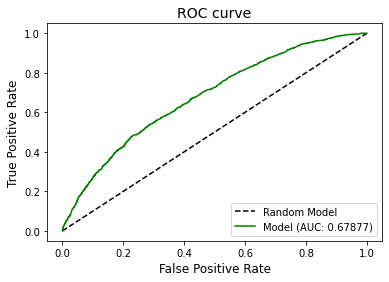

In [14]:
plot_auc_roc(y, y_pred)

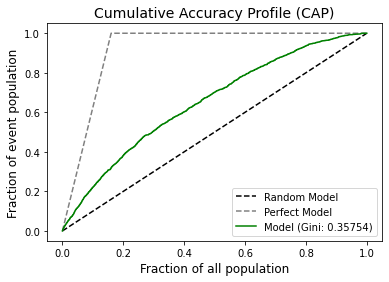

In [15]:
plot_cap(y, y_pred)

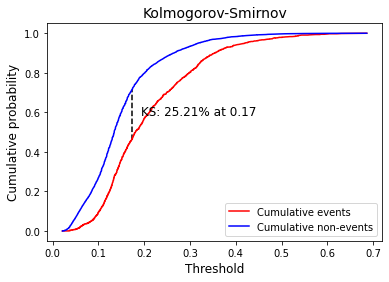

In [16]:
plot_ks(y, y_pred)

In [17]:
score = scorecard.score(X)

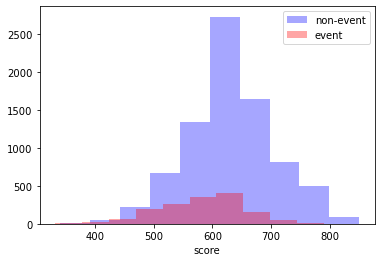

In [19]:
mask = y == 0
plt.hist(score[mask], label="non-event", color="b", alpha=0.35)
plt.hist(score[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score")
plt.legend()
plt.show()

In [29]:
scorecard.table(style='detailed')

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,credit_policy,0,"(-inf, 0.5000)",1868,0.195030,1349,519,0.277837,-0.702609,0.120055,0.014706,-0.452183,50.800701
1,credit_policy,1,"[0.5000, inf)",7710,0.804970,6696,1014,0.131518,0.229783,0.039263,0.004897,-0.452183,98.275354
2,credit_policy,2,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.452183,86.575474
3,credit_policy,3,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.452183,86.575474
0,purpose,0,"[major_purchase, credit_card]",1699,0.177386,1504,195,0.114773,0.385060,0.023006,0.002858,-0.867576,124.192483
1,purpose,1,[debt_consolidation],3957,0.413134,3354,603,0.152388,0.058168,0.001370,0.000171,-0.867576,92.257942
2,purpose,2,[all_other],2331,0.243370,1944,387,0.166023,-0.043746,0.000473,0.000059,-0.867576,82.301879
3,purpose,3,"[home_improvement, educational]",972,0.101483,796,176,0.181070,-0.148709,0.002359,0.000295,-0.867576,72.047892
4,purpose,4,[small_business],619,0.064627,447,172,0.277868,-0.702760,0.039801,0.004875,-0.867576,17.921893
5,purpose,5,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.867576,86.575474
